In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
path = '../../data/data자료/Credit.csv'
pd.read_csv(path)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


In [3]:
credit = pd.read_csv(path)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580


In [4]:
#데이터 타입 확인 
credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Own           object
Student       object
Married       object
Region        object
Balance        int64
dtype: object

In [5]:
#기초 통계 확인 
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [8]:
credit.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,South,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


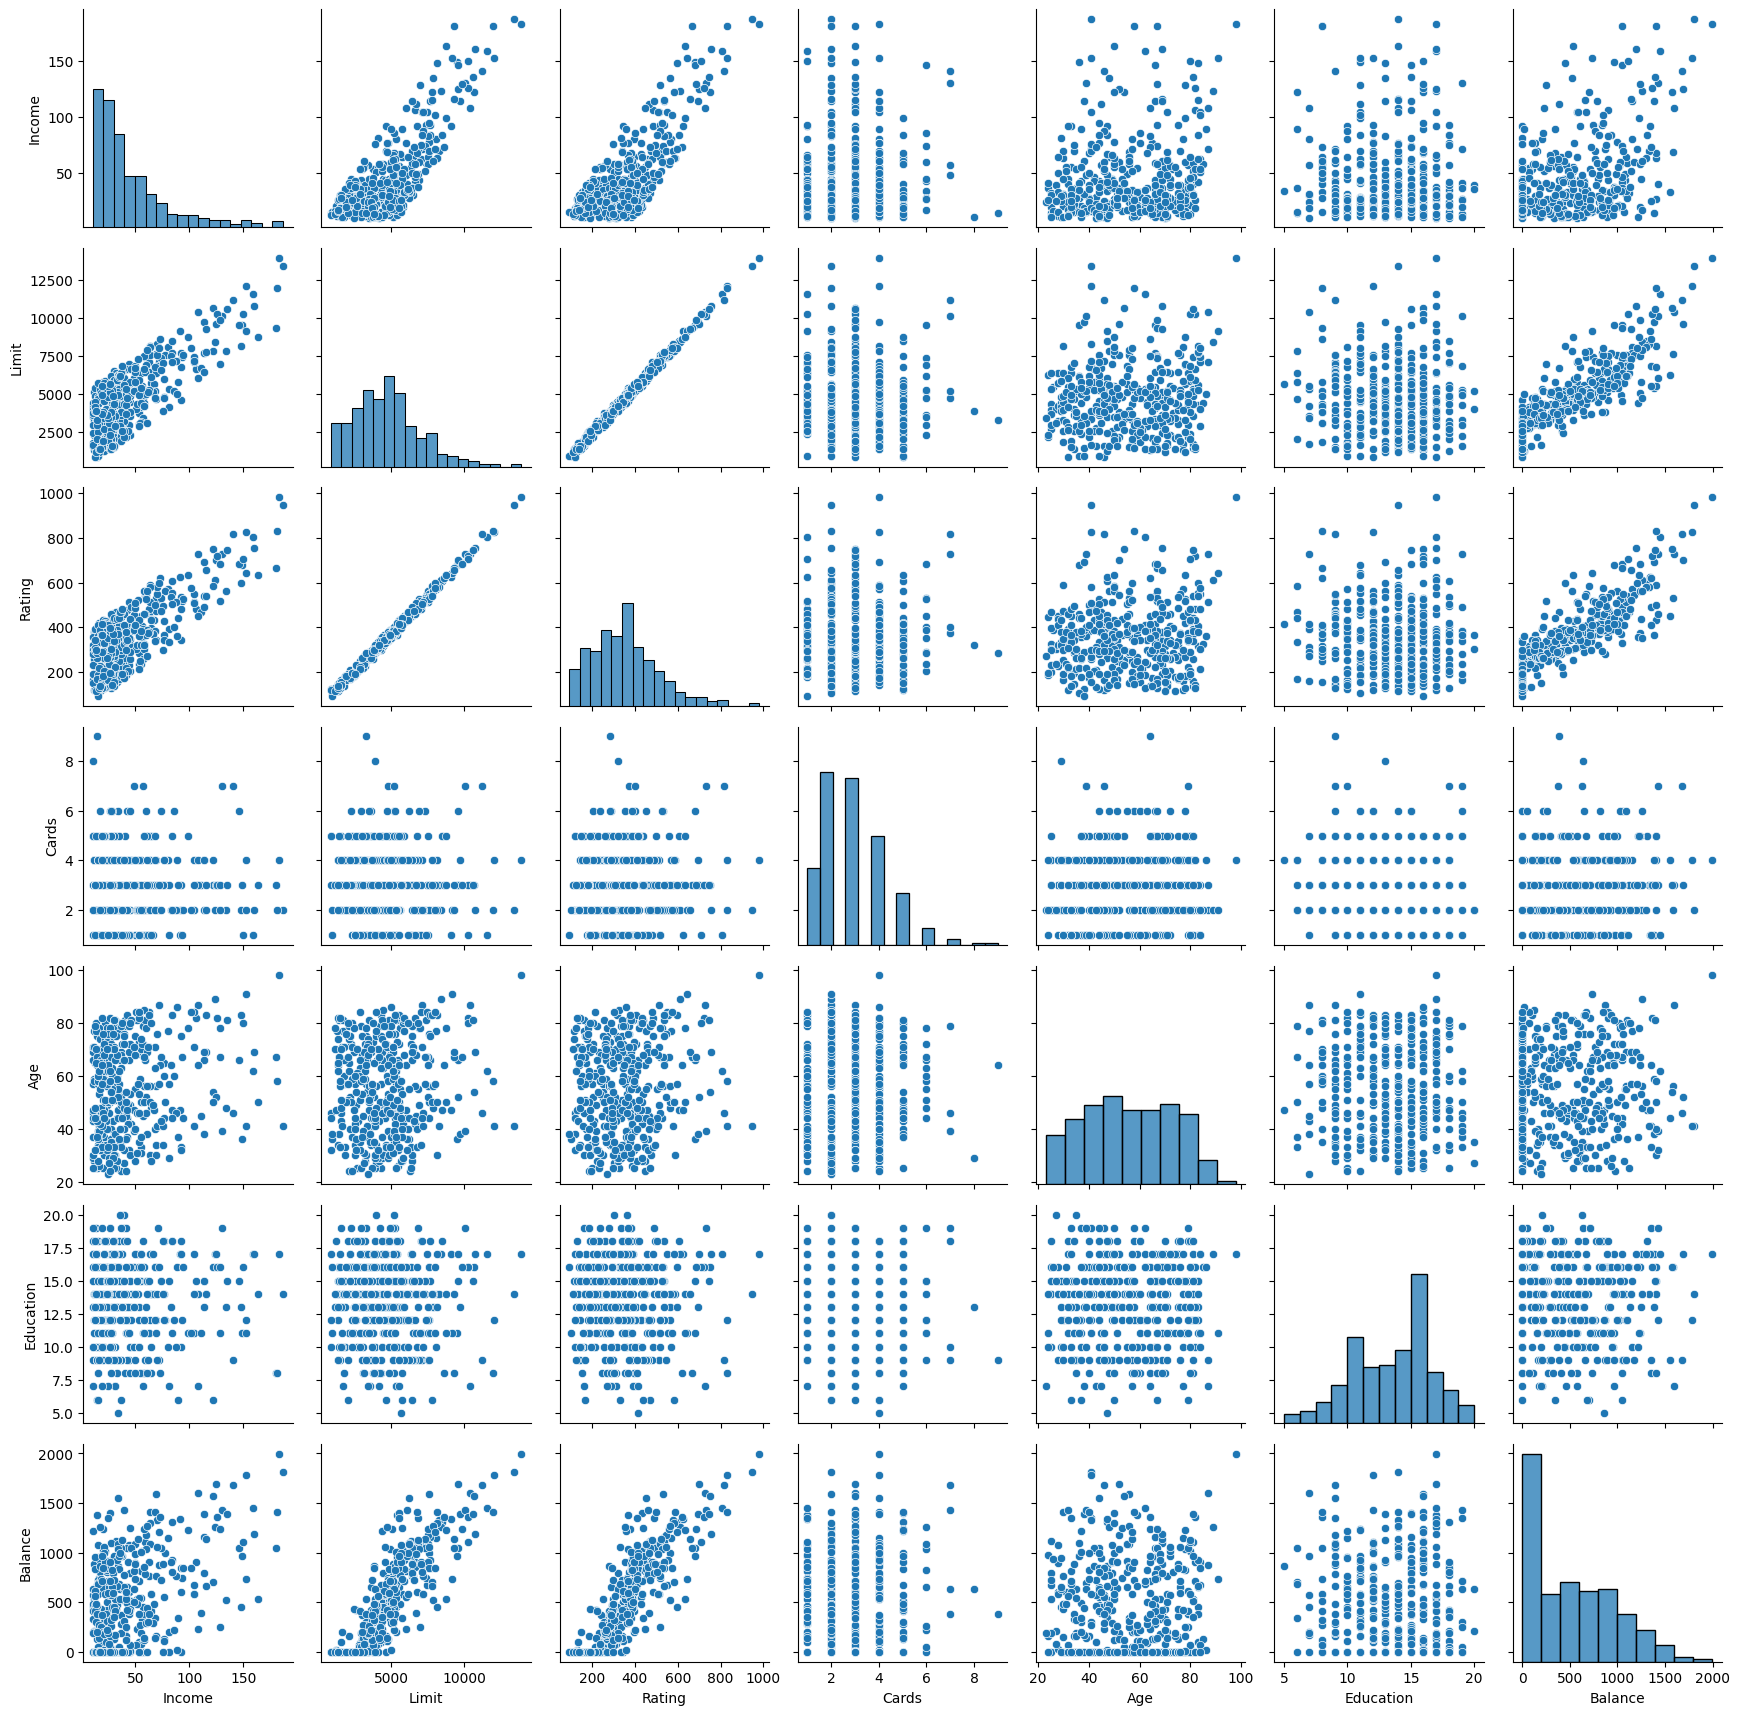

In [9]:
#scatter plot, histogram 확인 
g = sns.PairGrid(credit)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [10]:
#더미변수 생성 
credit.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own',
       'Student', 'Married', 'Region', 'Balance'],
      dtype='object')

In [12]:
#yes의 값을 0 / no의 값을 1 
credit['Student_dummy'] = credit['Student'].replace(to_replace='Yes', value=0)
credit['Student_dummy'] = credit['Student_dummy'].replace(to_replace='No', value=1)

C:\Users\Master\AppData\Local\Temp\ipykernel_8220\3671305857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit['Student_dummy'] = credit['Student_dummy'].replace(to_replace='No', value=1)


In [13]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,1
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,0
2,104.593,7075,514,4,71,11,No,No,No,West,580,1


In [14]:
credit.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,South,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000,0.900000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877,0.300376
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000,1.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000,1.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000,1.000000


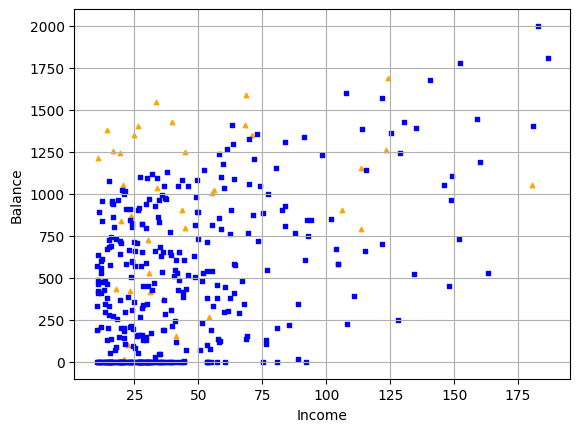

In [16]:
#balance와 income, student 관계성 확인 

fig, ax = plt.subplots()

#학생인 경우 
income_student = credit[credit['Student'] == 'Yes']

#학생이 아닌 경우
income_non_student = credit[credit['Student'] == 'No']

ax.scatter(income_student['Income'], income_student['Balance'], s=10, marker="^", c = 'orange')
ax.scatter(income_non_student['Income'], income_non_student['Balance'], s=10, marker="s", c = 'blue')

ax.set(xlabel=('Income'),
       ylabel=('Balance'))

plt.grid()
plt.show()


<Axes: xlabel='Student', ylabel='Balance'>

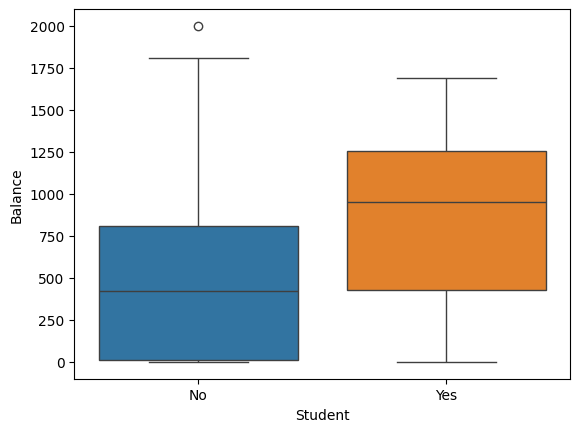

In [17]:
sns.boxplot(x=credit['Student'], y=credit['Balance'], data=credit, hue='Student')

In [19]:
credit['Region'].value_counts()

Region
South    199
West     102
East      99
Name: count, dtype: int64

<Axes: xlabel='Student', ylabel='Balance'>

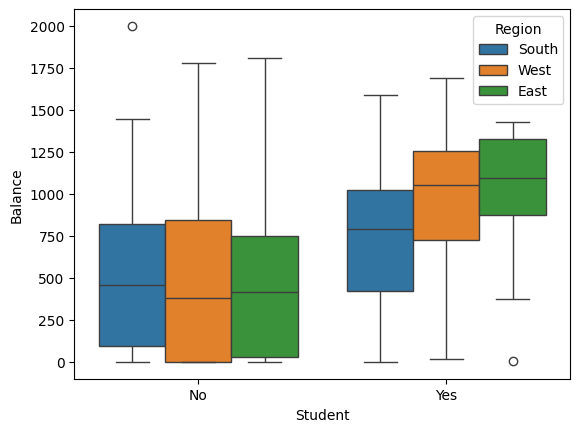

In [20]:
sns.boxplot(x=credit['Student'], y=credit['Balance'], data=credit, hue='Region')

Auto dataset 실습 

In [21]:
path = '../../data/data자료/Auto.csv'
pd.read_csv(path)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [22]:
auto = pd.read_csv(path)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [23]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [24]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


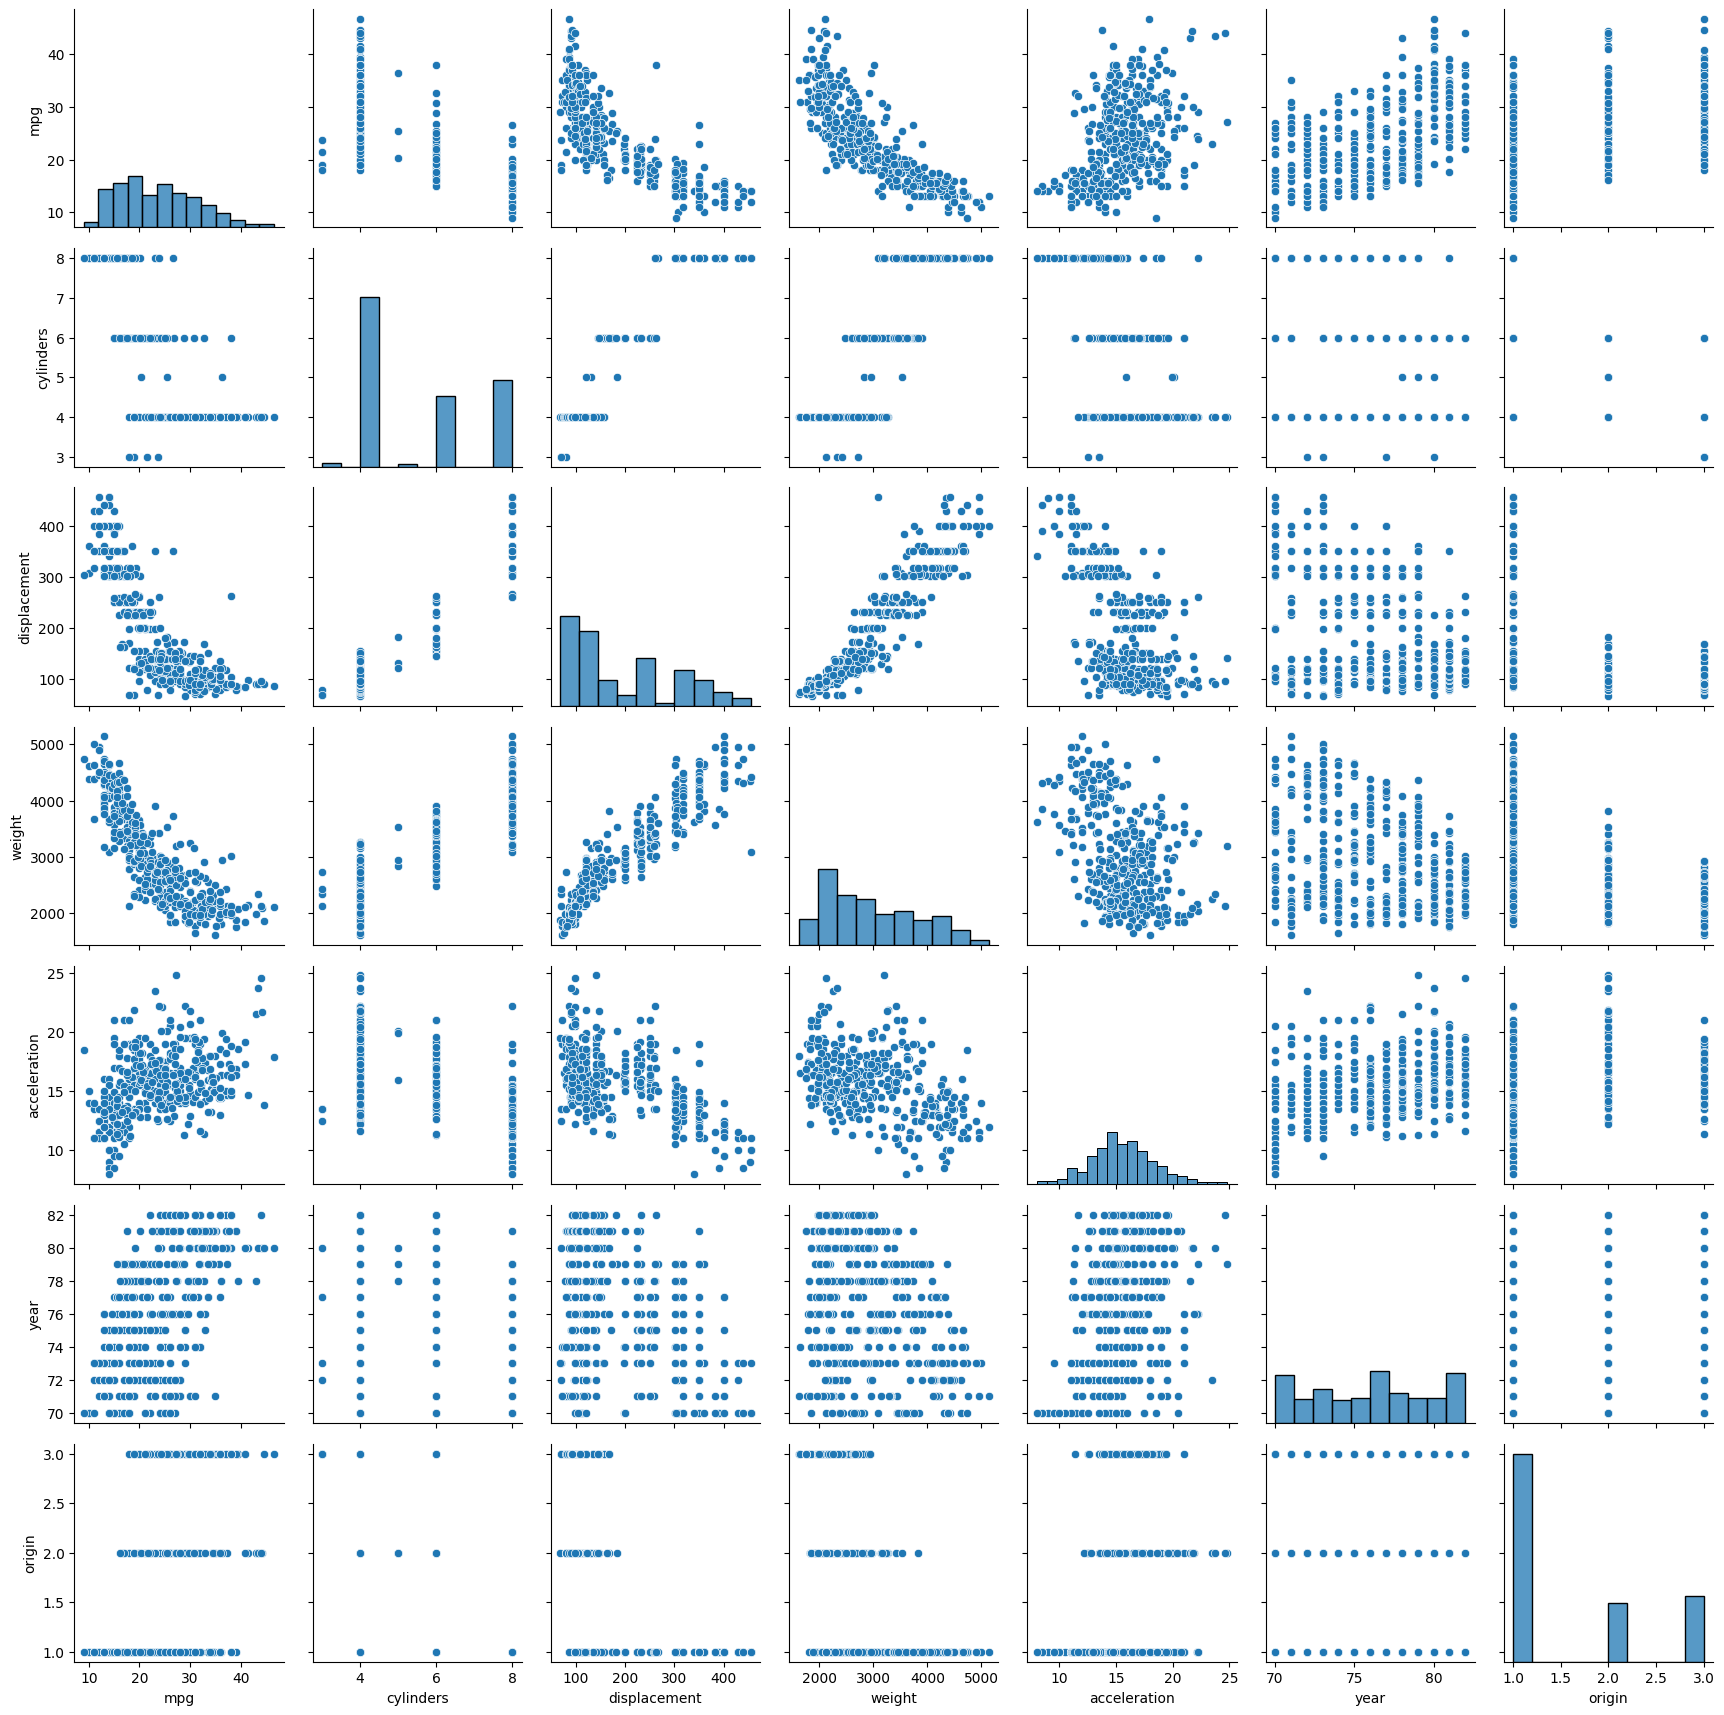

In [25]:
g = sns.PairGrid(auto)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [26]:
auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [27]:
auto['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [28]:
auto['horsepower'] = auto['horsepower'].replace(to_replace="?", value=0)

In [29]:
#데이터 타입 변경 
# auto['horsepower'] = auto['horsepower'].astype('int') #방법1
auto['horsepower'] = pd.to_numeric(auto['horsepower']) # 방법2

In [30]:
auto['horsepower'].dtypes

dtype('int64')

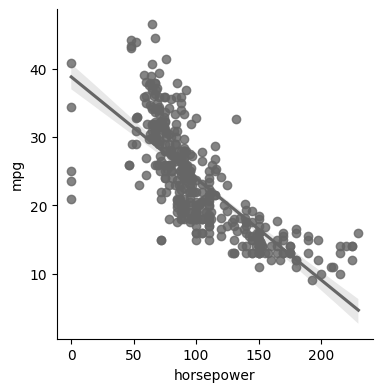

In [31]:
#mpg (연비)와 horsepower 관계 

g = sns.PairGrid(auto, y_vars=['mpg'], x_vars=['horsepower'], height=4)
g.map(sns.regplot, color='.4')

Income data EDA

In [32]:
path = '../../data/data자료/Income.csv'
pd.read_csv(path)

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922
5,6,18.275862,26.206897,71.504485
6,7,19.931034,150.344828,87.970467
7,8,21.172414,82.068966,79.811030
8,9,20.344828,88.275862,90.006327
9,10,100.000000,113.103448,45.655530


In [34]:
income = pd.read_csv(path, index_col=0)
income.head(3)

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727


In [35]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  30 non-null     float64
 1   Seniority  30 non-null     float64
 2   Income     30 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [36]:
income.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,19.386207,93.862069,62.744733
std,15.648716,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,13.827586,44.827586,36.392043
50%,17.241379,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,100.000000,187.586207,99.917173


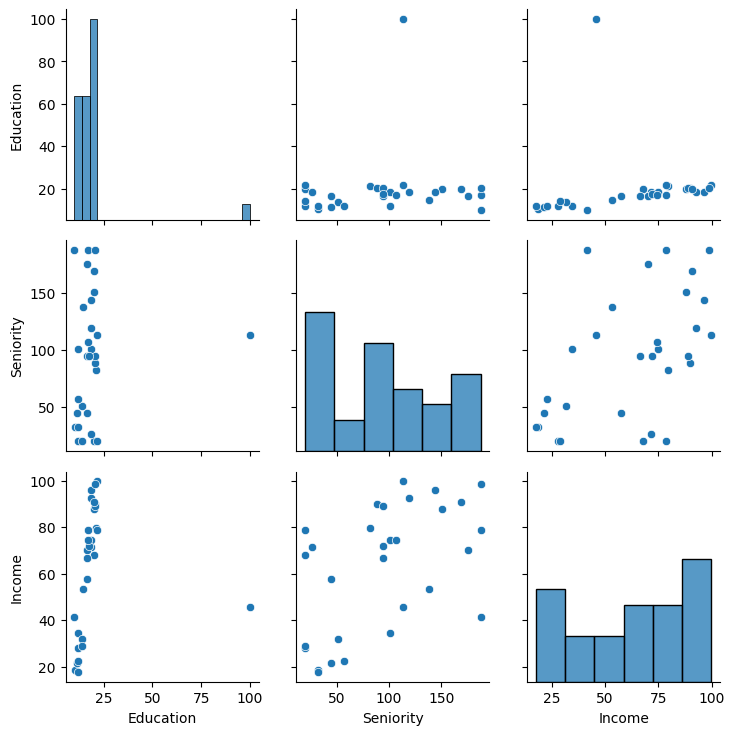

In [37]:
#scatter plot, histogram 확인 
g = sns.PairGrid(income)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [38]:
#이상치 수정/삭제
income[:20]

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,100.000000,113.103448,45.655530


In [39]:
income.loc[10, 'Education'] = 10 
income[:20]

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,10.000000,113.103448,45.655530


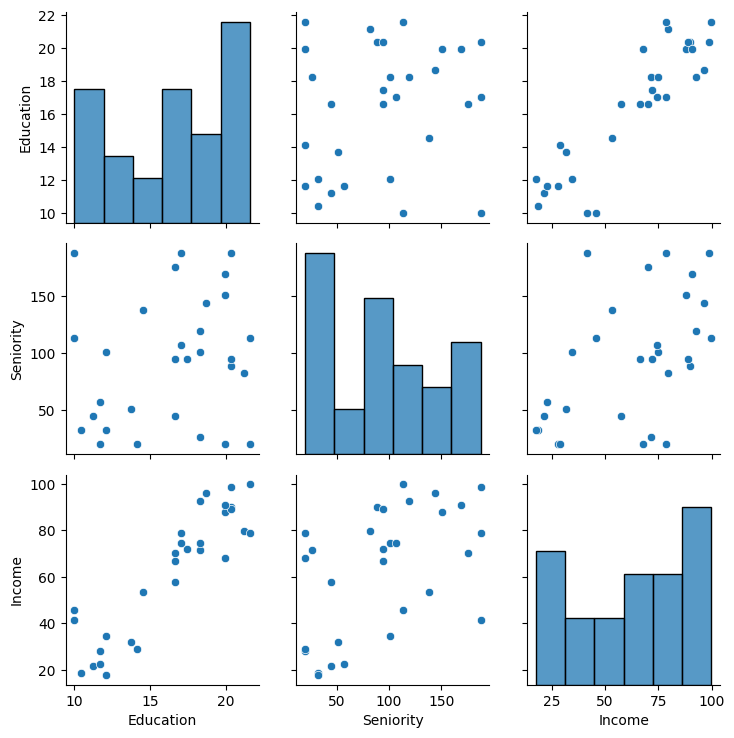

In [40]:
# scatter plot, histgoram 확인

g = sns.PairGrid(income)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [42]:
#이상치 삭제 
income = income.drop([10])

In [43]:
income

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
11,13.724138,51.034483,31.913808


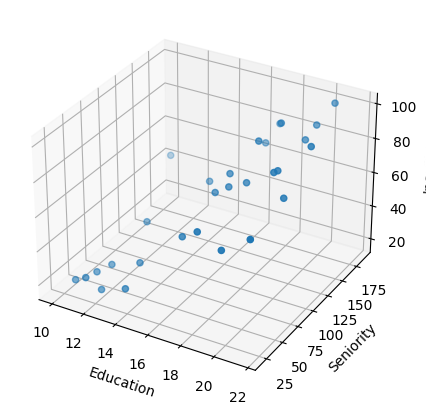

In [45]:
#income, education, seniority 관계성 확인 

#3차원 그리기 
plt.figure(figsize=(6,5))

axes = plt.axes(projection='3d')

axes.scatter3D(income['Education'], income['Seniority'], income['Income'])

axes.set_xlabel('Education')
axes.set_ylabel('Seniority')
axes.set_zlabel('Income')

plt.show()